In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:70% !important; }</style>'))

In [2]:
import os
import requests
import pandas as pd
from datetime import datetime
from tqdm.notebook import tqdm
import time

In [3]:
start = datetime(2018, 1, 1)
end = datetime(2021, 9, 1)
dt_range = pd.date_range(start = start, end = end)
dt_range = pd.DataFrame(dt_range, columns=['date'])

In [4]:
dt_range.head(2)

,date
0,2018-01-01
1,2018-01-02


In [5]:
dt_range.loc[0, 'date'].strftime("%Y-%m-%dT%H:%M:%SZ")

'2018-01-01T00:00:00Z'

# Twitter Scrape
Maximum tweet count per query is 500

In [9]:
# api token

token = os.environ['TWITTER_KEY']


KeyError: 'TWITTER_KEY'

In [10]:
# define api end point
url = 'https://api.twitter.com/2/tweets/search/all'

In [11]:
header = {"Authorization": f"Bearer {token}"}

NameError: name 'token' is not defined

In [103]:
params = {
    "query":'bitcoin',
    "start_time":"2021-08-12T00:00:00Z",
    "end_time":"2021-08-12T01:00:00Z",
    "max_results":500
}

In [ ]:
start = dt_range['date'].iloc[0].strftime("%Y-%m-%dT%H:%M:%SZ")
end = dt_range['date'].iloc[-1].strftime("%Y-%m-%dT%H:%M:%SZ")
print(start)
print(end)

In [119]:
results = []
for idx in tqdm(dt_range.index[291:]):
    start = dt_range['date'].iloc[idx].strftime("%Y-%m-%dT%H:%M:%SZ")
    if idx == dt_range.index[-1]:
        end = (datetime.today - pd.Timedelta(hours = 2)).strftime("%Y-%m-%dT%H:%M:%SZ")
    else:
        end = dt_range['date'].iloc[idx+1].strftime("%Y-%m-%dT%H:%M:%SZ")
    error_counter = 0
    while True:
        try:
            response = requests.get(url, headers = header, params = params)
            df_temp = pd.DataFrame(response.json()['data'])
            df_temp['start'] = start
            df_temp['end'] = end
            results.append(df_temp)
            break
        except:
            error_counter += 1
            if error_counter == 5:
                print(f'skipping - {start}')
                break
            time.sleep(2)
            
    time.sleep(.5)

  0%|          | 0/1049 [00:00<?, ?it/s]

skipping - 2019-08-15T00:00:00Z
skipping - 2019-08-16T00:00:00Z
skipping - 2019-08-17T00:00:00Z
skipping - 2019-08-18T00:00:00Z
skipping - 2019-08-19T00:00:00Z
skipping - 2019-08-20T00:00:00Z
skipping - 2019-08-21T00:00:00Z
skipping - 2019-08-22T00:00:00Z
skipping - 2019-08-23T00:00:00Z
skipping - 2019-08-24T00:00:00Z
skipping - 2019-08-25T00:00:00Z
skipping - 2019-08-26T00:00:00Z
skipping - 2019-08-27T00:00:00Z
skipping - 2019-08-28T00:00:00Z
skipping - 2019-08-29T00:00:00Z
skipping - 2019-08-30T00:00:00Z
skipping - 2019-08-31T00:00:00Z
skipping - 2019-09-01T00:00:00Z
skipping - 2019-09-02T00:00:00Z
skipping - 2019-09-03T00:00:00Z
skipping - 2019-09-04T00:00:00Z
skipping - 2019-09-05T00:00:00Z
skipping - 2019-09-06T00:00:00Z
skipping - 2019-09-07T00:00:00Z
skipping - 2019-09-08T00:00:00Z
skipping - 2019-09-09T00:00:00Z
skipping - 2019-09-10T00:00:00Z
skipping - 2019-09-11T00:00:00Z
skipping - 2019-09-12T00:00:00Z
skipping - 2019-09-13T00:00:00Z
skipping - 2019-09-14T00:00:00Z
skipping

KeyboardInterrupt: 

# Twitter Count
Max return is 30

In [ ]:
# sample params
params = {
    "query":'bitcoin',
    "start_time":f"{start}",
    "end_time":f"{end}",
    "granularity":'day'
}

In [80]:
# loop through date range
results = []
counter = 0
for i in tqdm(range(0, len(dt_range), 30)):
    start = dt_range['date'].iloc[i].strftime("%Y-%m-%dT%H:%M:%SZ")
    if i+29 < len(dt_range):
        end = dt_range['date'].iloc[i+29].strftime("%Y-%m-%dT%H:%M:%SZ")
    else:
        end = (datetime.today() - pd.Timedelta(hours = 2)).strftime("%Y-%m-%dT%H:%M:%SZ")
    params = {
        "query":'bitcoin',
        "start_time":f"{start}",
        "end_time":f"{end}",
        "granularity":'day'
        }
    response = requests.get(url, headers = header, params = params)
    results.append(pd.DataFrame(response.json()['data']))
    time.sleep(.5)

  0%|          | 0/45 [00:00<?, ?it/s]

In [90]:
df_count = pd.concat(results, axis = 0).reset_index(drop = True)
df_count['tweet_count'] = df_count['tweet_count'].astype(int)

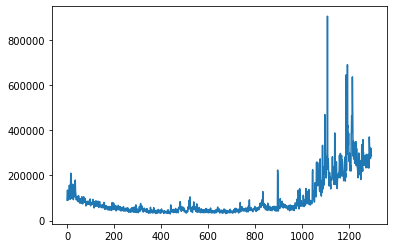

In [92]:
df_count['tweet_count'].plot();

In [93]:
df_count.to_csv("../cryptocurrency_trading/data/tweet_count_010921.csv")